In [1]:
import warnings, time
import os, glob
import numpy as np
import matplotlib.pyplot as plt
from alvra_tools.utils import *
from alvra_tools.channels import *
from alvra_tools.load_data import *

from sfdata import SFDataFile, SFDataFiles, SFScanInfo
from IPython.display import clear_output, display
#warnings.filterwarnings('ignore', category=DeprecationWarning)
#warnings.filterwarnings('ignore', category=UserWarning)

import sfdata.sfdatafile
sfdata.sfdatafile.ju = None

%matplotlib widget


In [109]:
pgroup='p17502'
runnumber = 16
print ('run: {:04d}'.format(runnumber))

#############################################################
jsonfile = ''
jsonfile = glob('/sf/alvra/data/{}/raw/*{:04d}*/meta/scan.json'.format(pgroup, runnumber))[0]
titlestring = str( pgroup + ' --- ' +jsonfile.split('/')[-3])
jsonfile

run: 0016


'/sf/alvra/data/p17502/raw/run0016/meta/scan.json'

In [110]:
def Get_ROI_names(step):
    channels =[]
    for n in step.names:
        if "ROI_" in n:
            tag = n.split('_')[-1]
            channels.append((f"JF02T09V03:ROI_{tag}"))
    return channels

In [124]:
channel_list = []

import sfdata.sfdatafile
sfdata.sfdatafile.ju = None
scan = SFScanInfo(jsonfile)

s = scan[0]
channels_ROI = Get_ROI_names(s)
channel_list = channel_list + channels_ROI
print (channel_list)

for i, step in enumerate(scan):
    check_files_and_data(step)
    check = get_filesize_diff(step)  
    
    if check:
        clear_output(wait=True)
        filename = scan.files[i][0].split('/')[-1].split('.')[0]
        print ('Processing: {}'.format(jsonfile.split('/')[-3]))
        print ('Step {} of {}: Processing {}'.format(i+1, len(scan.files), filename))

        results, _ = load_data_compact(channel_list, step)


/sf/alvra/anaconda/alvra-analysis/lib/python3.8/site-packages/sfdata-0.2.8-py3.10.egg/sfdata/sfdatafile.py:24: UserWarning: Could not import jungfrau_utils, will treat JF files as regular files.
  self.file, channels = load_from_file(fname)
/sf/alvra/anaconda/alvra-analysis/lib/python3.8/site-packages/sfdata-0.2.8-py3.10.egg/sfdata/sfdatafile.py:73: UserWarning: Skipping channel "general" since it caused DatasetNotInGroupError: Cannot get dataset "data" from: <HDF5 group "/general" (4 members)>
  print_skip_warning(exc, cn)


['JF02T09V03:ROI_1', 'JF02T09V03:ROI_2', 'JF02T09V03:ROI_3', 'JF02T09V03:ROI_4', 'JF02T09V03:ROI_5']


In [123]:
scan.files[0]

['/sf/alvra/data/p17502/raw/run0016/data/acq0001.PVDATA.h5',
 '/sf/alvra/data/p17502/raw/run0016/data/acq0001.BSDATA.h5',
 '/sf/alvra/data/p17502/raw/run0016/data/acq0001.CAMERAS.h5',
 '/sf/alvra/data/p17502/raw/run0016/data/acq0001.JF02T09V03.h5']

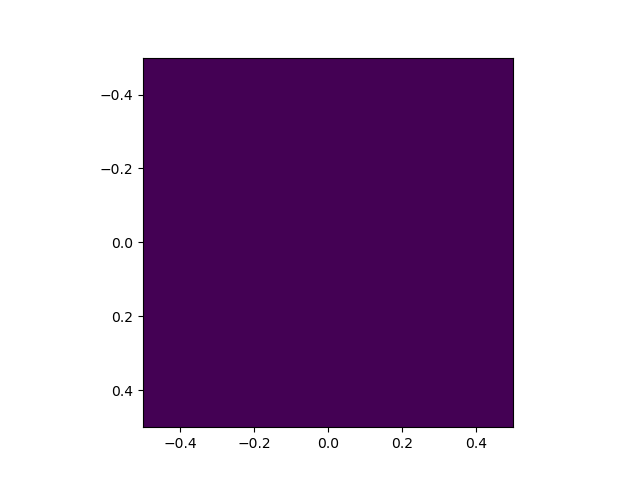

In [42]:
plt.figure()
plt.imshow(np.mean(roi_4, axis=0))
plt.show()

In [222]:
pgroup='p20774'
runnumber = 187
print ('run: {:04d}'.format(runnumber))

#############################################################
jsonfile = ''
jsonfile = glob('/sf/alvra/data/{}/raw/*{:04d}*/meta/scan.json'.format(pgroup, runnumber))[0]
titlestring = str( pgroup + ' --- ' +jsonfile.split('/')[-3])
jsonfile

run: 0187


'/sf/alvra/data/p20774/raw/run0187-RuRh_ClK_timescan_2820p0eV/meta/scan.json'

In [223]:
import math
from sfdata import SFScanInfo
scan = SFScanInfo(jsonfile)
scan = remove_JF_from_scan(scan)

for i, step in enumerate(scan):
    check = get_filesize_diff(step)
    if check:
        print (i)
print ('processed {} out of {} files'.format(i+1, len(scan)))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
processed 21 out of 21 files


In [118]:
np.std(size)/np.mean(size)

0.0016928064167166187

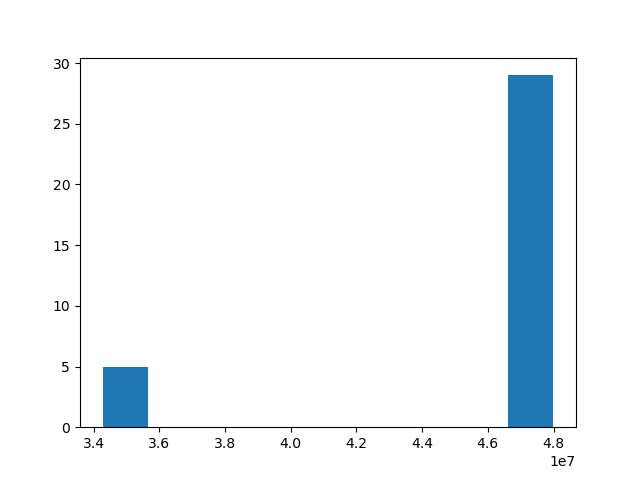

In [99]:
plt.figure()
plt.hist(size)
plt.show()

In [218]:
def get_filesizes(step):
    for file in step.fnames:
        exists = os.path.isfile(file)
        if exists:
            if 'BSDATA' in file:
                bsfile=str(file)
                size = os.stat(bsfile).st_size
                break
            else: 
                size = np.NaN
        else:
            size = np.NaN
    return size

def get_filesize_diff(step):
    s1 = get_filesizes(step)
    time.sleep(0.1)
    s2 = get_filesizes(step)
    if size1==size2:
        return True
    return False

In [192]:
get_filesizes(step)

nan

In [198]:
for file in step.fnames:
    print (file)

/sf/alvra/data/p20774/raw/run0172-RuRh_ClK_monoscan_1ns/data/acq0005.BSDATA.h5
/sf/alvra/data/p20774/raw/run0172-RuRh_ClK_monoscan_1ns/data/acq0005.PVDATA.h5


In [2]:
filelist=[]
for file in glob('/sf/alvra/data/p19635/raw/*run*/timetool/*.SPECENC.h5'):
    filelist.append(file)
filelist = sorted(filelist, key = os.path.getmtime)
patch =  filelist[:]
print (len(patch))

1709


In [3]:
savedir = '/sf/alvra/data/p19635/work/Claudio/'
os.makedirs(savedir, exist_ok=True)

In [18]:
from sfdata import SFProcFile

for specenc in patch:
    with h5py.File(specenc) as f:
        pids = f['pulse_ids'][:]
        arrival_times = f['arrival_times'][:]
        arrival_times_amplitude = f['arrival_times_amplitude'][:]

    run_name = specenc.split('/')[-3]
    acq_name = specenc.split('/')[-1]
    with SFProcFile(savedir+run_name+'_'+acq_name) as ff:
        ff['arrival_times'] = (pids, arrival_times)
        ff['arrival_times_amplitude'] = (pids, arrival_times_amplitude)
    
                

In [4]:
specenclist = []
for specenc in glob(savedir+'*SPECENC*'):
    specenclist.append(specenc.split('/')[-1].split('_')[0])

In [5]:
pgroup='p19635'
runnumber = specenclist[0]
print ('run: {}'.format(runnumber))

#############################################################
jsonfile = ''
jsonfile = glob('/sf/alvra/data/{}/raw/*{}*/meta/scan.json'.format(pgroup, runnumber))[0]
jsonfile

run: run0286


'/sf/alvra/data/p19635/raw/run0286/meta/scan.json'

In [6]:
channel_signal      = "SARES11-SPEC125-M1.roi_signal_x_profile"
channel_reference   = "SARES11-SPEC125-M1.roi_background_x_profile"
channel_parameters  = "SARES11-SPEC125-M1.processing_parameters"
channel_TT_arrTimes = "arrival_times"
channel_TT_arrAmps  = "arrival_times_amplitude"
channel_Izero117    = "SAROP11-PBPS117:INTENSITY"  


channel_list_pp = [channel_Events, channel_reference, channel_signal, channel_delay_topas, channel_TT_arrTimes, channel_TT_arrAmps, channel_Izero117]
channel_list_all = channel_list_pp

arrTimes_all = []
arrAmps_all = []

for ff in specenclist[:1]:
    jsonfile = glob('/sf/alvra/data/p19635/raw/*{}*/meta/scan.json'.format(ff))[0]

    from sfdata import SFScanInfo
    scan = SFScanInfo(jsonfile)

    pump_probe_avg = []
    pump_probe_allshots = []
    arrTimes_scan = []
    arrAmps_scan = []
    Izero_scan = []

    for i, step in enumerate(scan):
        clear_output(wait=True)
        run = step.fnames[0].split('/')[-3]
        acq = step.fnames[0].split('/')[-1].split('.')[0]
        file2add = glob(savedir+'*{}*{}*'.format(run,acq))[0]
        
        step.update(SFDataFile(file2add))
        
        print (jsonfile)
        print ('{}/{}: {} {}'.format(i+1,len(scan), run, acq))
        results_pp, results, _, _ = load_data_compact_laser_pump(channel_list_pp, channel_list_all, step)
        
        arrTimes_scan.extend(results_pp[channel_TT_arrTimes].pump)
        arrAmps_scan.extend(results_pp[channel_TT_arrAmps].pump)
        Izero_scan.extend(results_pp[channel_Izero117].pump)
    
    np.save(savedir+run+'_arrTimes.npy', arrTimes_scan) 
    np.save(savedir+run+'_arrAmps_scan.npy', arrAmps_scan) 
    np.save(savedir+run+'_Izero.npy', Izero_scan) 
        
    arrTimes_all.extend(arrTimes_scan)
    arrAmps_all.extend(arrAmps_scan)
np.save(savedir+'arrTimes_ALL.npy', arrTimes_all) 
np.save(savedir+'arrAmps_scan+ALL.npy', arrAmps_all) 
        
    


/sf/alvra/data/p19635/raw/run0286/meta/scan.json
50/50: run0286 acq0050

--------------------------------------------------------------------------------

SAR-CVME-TIFALL5:EvtSet                     3003 / 3003 ->  0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-SPEC125-M1.roi_background_x_profile 2682 / 3003 -> 11% loss ▇▇▇▇▇▇▇▇
SARES11-SPEC125-M1.roi_signal_x_profile     2682 / 3003 -> 11% loss ▇▇▇▇▇▇▇▇
SAROP11-PBPS117:INTENSITY                   2992 / 3003 ->  0% loss ▇▇▇▇▇▇▇▇▇▇
SLAAR11-LMOT-M451:ENC_1_BS                  3003 / 3003 ->  0% loss ▇▇▇▇▇▇▇▇▇▇
arrival_times                               2266 / 3003 -> 25% loss ▇▇▇▇▇▇▇
arrival_times_amplitude                     2266 / 3003 -> 25% loss ▇▇▇▇▇▇▇

over the whole data set: 2030 / 3003 -> 32% loss
complete channels: 2 / 7 -> 71% incomplete

--------------------------------------------------------------------------------

Probe rep rate (FEL) is 100.0 Hz
Pump scheme is 1:1
Loaded 828 pump and 828 unpump shots


In [ ]:
np

In [58]:
run = 286
file2load = glob(savedir+'*{:04d}*_*arrAmps*'.format(run))
arrAmps = np.load(file2load[0])
file2load = glob(savedir+'*{:04d}*_*Izero*'.format(run))
Izero = np.load(file2load[0])

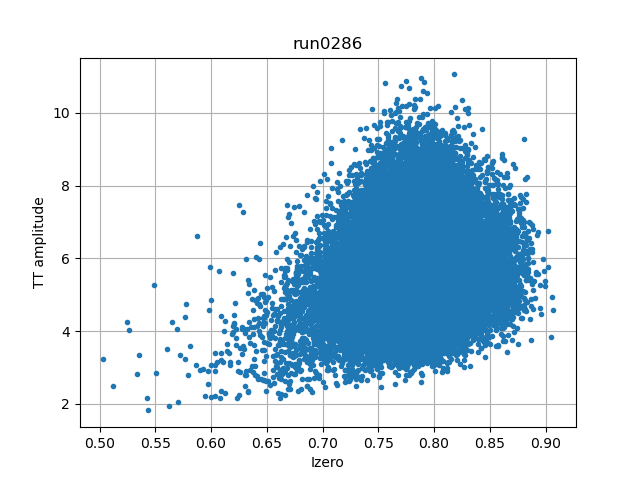

0.11140593798795287


In [59]:
plt.figure()
plt.title('run{:04d}'.format(run))
plt.plot(Izero, arrAmps, '.')
plt.xlabel('Izero')
plt.ylabel('TT amplitude')

plt.grid()
plt.show()
from scipy.stats.stats import pearsonr
print (pearsonr(Izero,arrTimes)[0])

In [62]:
scan = SFScanInfo('/sf/alvra/data/p20222/raw/run0606-FebpyCN4_EtOH_585nm_001/meta/scan.json')
#scan = SFScanInfo('/sf/alvra/data/p20263/raw/run0029-FePhen_535nm_4uJ_shortpulse_001/meta/scan.json')
JF = 'JF06T32V02'

In [75]:
import json
with open('/sf/alvra/data/p20222/raw/run0606-FebpyCN4_EtOH_585nm_001/meta/scan.json') as f:
    data = json.load(f)
shots = [delta[1]-delta[0] for delta in data['pulseIds']]
maxshots = max(shots)
maxshots

1000

In [176]:
def correct_scan(scan, JF, binned, work):
    for i, files in enumerate(scan.files):
        new_files = []
        for sc_file in files:
           # print (sc_file)
            if "JF02" in sc_file:
                continue
            if "JF06" in sc_file:
                if work:
                    sc_file = sc_file.replace('p20222/raw/','p20222/work/reduced_data/no_rounding/')
                else:
                    check_raw_folder = scan.fname.replace('meta/scan.json', 'raw_data/')
                    folder_raw_size = len(os.listdir(check_raw_folder))
                    #print ('size folder={}'.format(folder_raw_size))
                    if binned:
                        if folder_raw_size>0:
                            sc_file = sc_file
                    else:
                        if folder_raw_size>0:
                            sc_file = sc_file.replace('/data/acq','/raw_data/acq')
            #print (sc_file)
            new_files.append(sc_file)
        scan.files[i] = new_files
    return scan

In [190]:
scan.files[0]

['/sf/alvra/data/p20222/raw/run0606-FebpyCN4_EtOH_585nm_001/data/acq0001.PVCHANNELS.h5',
 '/sf/alvra/data/p20222/raw/run0606-FebpyCN4_EtOH_585nm_001/data/acq0001.BSDATA.h5',
 '/sf/alvra/data/p20222/raw/run0606-FebpyCN4_EtOH_585nm_001/data/acq0001.CAMERAS.h5',
 '/sf/alvra/data/p20222/raw/run0606-FebpyCN4_EtOH_585nm_001/data/acq0001.JF06T32V02.h5',
 '/sf/alvra/data/p20222/raw/run0606-FebpyCN4_EtOH_585nm_001/data/acq0001.JF02T09V03.h5']

In [189]:
#scan = correct_scan(scan, JF, True, False)
for i,step in enumerate(scan[:1]):
    #print (step.files)
    print (i)
    #n_imgs = step[JF].shape[0]
    print (step)
    #print (step.fnames)
    #step = correct_path(scan, step, JF, False, False)
    #print (step.fnames)

Auto-located gain file: /sf/jungfrau/config/gainMaps/JF02T09V03/gains.h5
Auto-located pedestal file: /sf/alvra/data/p20222/raw/JF_pedestals/20220618_181755.JF02T09V03.res.h5
jungfrau file: 20:27 18.06.2022
pedestal file: 18:25 18.06.2022
    mtime difference: 2:01:24.007835
0
SFDataFiles("/sf/alvra/data/p20222/raw/run0606-FebpyCN4_EtOH_585nm_001/data/acq0001.BSDATA.h5", "/sf/alvra/data/p20222/raw/run0606-FebpyCN4_EtOH_585nm_001/data/acq0001.JF02T09V03.h5", "/sf/alvra/data/p20222/raw/run0606-FebpyCN4_EtOH_585nm_001/data/acq0001.JF06T32V02.h5"): 419 channels


In [179]:
#scanfiles = correct_files(scan, JF, False, False)
for i,step in enumerate(scan[:1]):
    
    print (i)
    #n_imgs = step[JF].shape[0]
    print (step)
    #print (step.fnames)
    #step = correct_path(scan, step, JF, False, False)
    #print (step.fnames)

Auto-located gain file: /sf/jungfrau/config/gainMaps/JF02T09V03/gains.h5
Auto-located pedestal file: /sf/alvra/data/p20263/raw/JF_pedestals/20220623_090848.JF02T09V03.res.h5
jungfrau file: 12:45 23.06.2022
pedestal file: 09:16 23.06.2022
    mtime difference: 3:28:40.914535
Auto-located gain file: /sf/jungfrau/config/gainMaps/JF06T32V02/gains.h5
Auto-located pedestal file: /sf/alvra/data/p20263/raw/JF_pedestals/20220623_090848.JF06T32V02.res.h5
jungfrau file: 12:45 23.06.2022
pedestal file: 09:32 23.06.2022
    mtime difference: 3:12:56.694153
0
SFDataFiles("/sf/alvra/data/p20263/raw/run0029-FePhen_535nm_4uJ_shortpulse_001/data/acq0001.BSDATA.h5", "/sf/alvra/data/p20263/raw/run0029-FePhen_535nm_4uJ_shortpulse_001/data/acq0001.JF02T09V03.h5", "/sf/alvra/data/p20263/raw/run0029-FePhen_535nm_4uJ_shortpulse_001/data/acq0001.JF06T32V02.h5"): 419 channels


In [55]:
filelist_raw = []
for file in glob.glob('/sf/alvra/data/p20222/raw/run0790-FebpyCN4_DMA_7uJ_short_001/data/*JF02*'):
    filelist_raw.append(file)
filelist_raw = sorted(filelist_raw, key = os.path.getmtime)
patch_raw =  filelist_raw[:]
print (len(patch_raw))

41


In [57]:
import jungfrau_utils as ju
datamatrix1_raw = []
datamatrix2_raw = []
datamatrix3_raw = []
datamatrix4_raw = []

for i,file in enumerate(patch_raw[:1]):
    print (file)
    
    with ju.File(file) as juf:
        #print (f['data']['JF02T09V03'].keys())
        data_raw = juf[:]
        
        data_raw = threshold(data_raw, 3, 50)
        
        #datamatrix1_raw.append(np.sum(dataroi1_raw,axis=0).sum(axis=0))
        #datamatrix2_raw.append(np.sum(dataroi2_raw,axis=0).sum(axis=0))
        #datamatrix3_raw.append(np.sum(dataroi3_raw,axis=0).sum(axis=0))
        #datamatrix4_raw.append(np.sum(dataroi4_raw,axis=0).sum(axis=0))
        clear_output(wait=True)

/sf/alvra/data/p20222/raw/run0790-FebpyCN4_DMA_7uJ_short_001/data/acq0001.JF02T09V03.h5
Auto-located gain file: /sf/jungfrau/config/gainMaps/JF02T09V03/gains.h5
Auto-located pedestal file: /sf/alvra/data/p20222/raw/JF_pedestals/20220618_181755.JF02T09V03.res.h5
jungfrau file: 22:39 19.06.2022
pedestal file: 18:25 18.06.2022
    mtime difference: 1 day, 4:13:45.970646


In [16]:
roi1 = (5050, 5170, 135, 205) #signal CRY2 low
roi2 = (5050, 5170, 315, 365) #signan CRY2 up

roi3 = (8400, 8540, 155, 215) #signal CRY1 low
roi4 = (8400, 8540, 295, 345) #signal CRY1 up

dataroi1_raw = crop_roi(data_raw, roi1)
dataroi2_raw = crop_roi(data_raw, roi2)
dataroi3_raw = crop_roi(data_raw, roi3)
dataroi4_raw = crop_roi(data_raw, roi4)

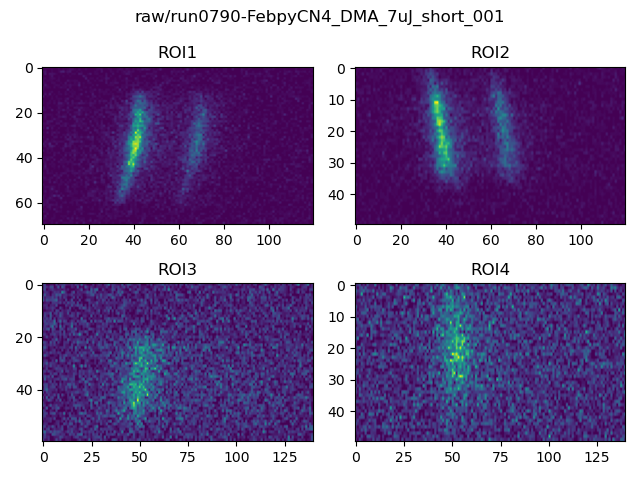

In [7]:
plt.figure()
plt.suptitle(patch_raw[0].split('/')[-4] +'/'+ patch_raw[0].split('/')[-3])

plt.subplot(221)
plt.title("ROI1")
plt.imshow(dataroi1_raw.sum(axis=0),aspect='auto')

plt.subplot(222)
plt.title("ROI2")
plt.imshow(dataroi2_raw.sum(axis=0),aspect='auto')

plt.subplot(223)
plt.title("ROI3")
plt.imshow(dataroi3_raw.sum(axis=0),aspect='auto')

plt.subplot(224)
plt.title("ROI4")
plt.imshow(dataroi4_raw.sum(axis=0),aspect='auto')

plt.tight_layout()

In [61]:
filelist=[]
for file in glob('/sf/alvra/data/p20222/work/reduced_data/no_rounding/*run*/data/acq0001.JF02*'):
    filelist.append(file)
filelist = sorted(filelist, key = os.path.getmtime)
patch =  filelist[:]
print (len(patch))


140


In [62]:
patch[0]

'/sf/alvra/data/p20222/work/reduced_data/no_rounding/run0032-FebpyCN4_H2O_timescan/data/acq0001.JF02T09V03.h5'

In [63]:
from sfdata import SFProcFile

with h5py.File(patch[0]) as f:
    print (f['data']['JF02T09V03'].keys())
    conversion_factor = f['data']['JF02T09V03']['conversion_factor']
    n_roi = f['data']['JF02T09V03']['n_roi']
    pixel_mask_roi_0 = f['data']['JF02T09V03']['pixel_mask_roi_0'][:]
    pixel_mask_roi_1 = f['data']['JF02T09V03']['pixel_mask_roi_1'][:]
    pixel_mask_roi_2 = f['data']['JF02T09V03']['pixel_mask_roi_2'][:]
    pixel_mask_roi_3 = f['data']['JF02T09V03']['pixel_mask_roi_3'][:]
    pixel_mask_roi_4 = f['data']['JF02T09V03']['pixel_mask_roi_4'][:]
    pixel_mask_roi_5 = f['data']['JF02T09V03']['pixel_mask_roi_5'][:]
    pixel_mask_roi_6 = f['data']['JF02T09V03']['pixel_mask_roi_6'][:]
    pixel_mask_roi_7 = f['data']['JF02T09V03']['pixel_mask_roi_7'][:]
    roi_0 = f['data']['JF02T09V03']['roi_0'][:]
    roi_1 = f['data']['JF02T09V03']['roi_1'][:]
    roi_2 = f['data']['JF02T09V03']['roi_2'][:]
    roi_3 = f['data']['JF02T09V03']['roi_3'][:]
    roi_4 = f['data']['JF02T09V03']['roi_4'][:]
    roi_5 = f['data']['JF02T09V03']['roi_5'][:]
    roi_6 = f['data']['JF02T09V03']['roi_6'][:]
    roi_7 = f['data']['JF02T09V03']['roi_7'][:]
    
    daq_rec = f['data']['JF02T09V03']['daq_rec'][:]
    data_roi_0 = f['data']['JF02T09V03']['data_roi_0'][:]
    data_roi_1 = f['data']['JF02T09V03']['data_roi_1'][:]
    data_roi_2 = f['data']['JF02T09V03']['data_roi_2'][:]
    data_roi_3 = f['data']['JF02T09V03']['data_roi_3'][:]
    data_roi_4 = f['data']['JF02T09V03']['data_roi_4'][:]
    data_roi_5 = f['data']['JF02T09V03']['data_roi_5'][:]
    data_roi_6 = f['data']['JF02T09V03']['data_roi_6'][:]
    data_roi_7 = f['data']['JF02T09V03']['data_roi_7'][:]
    
    pids = f['data']['JF02T09V03']['pulse_id'][:]
    
    frame_index = f['data']['JF02T09V03']['frame_index'][:]
    is_good_frame = f['data']['JF02T09V03']['is_good_frame'][:]

with SFProcFile('/sf/alvra/data/p20222/work/reduced_data/no_rounding/run0049-FebpyCN4_H2O_timescan_001/data/test0001.h5') as f:
    f['data_roi_0'] = (pids, data_roi_0)
    f['data_roi_1'] = (pids, data_roi_1)
    f['data_roi_2'] = (pids, data_roi_2)
    f['data_roi_3'] = (pids, data_roi_3)
    f['data_roi_4'] = (pids, data_roi_4)
    f['data_roi_5'] = (pids, data_roi_5)
    f['data_roi_6'] = (pids, data_roi_6)
    f['data_roi_7'] = (pids, data_roi_7)
    f['is_good_frame'] = (pids, is_good_frame)
    f['frame_index'] = (pids, frame_index)
    f['daq_rec'] = (pids, daq_rec)
    
    #f.meta['conversion_factor'] = conversion_factor
    #f.meta['n_roi'] = n_roi
    f.meta['pixel_mask_roi_0'] = pixel_mask_roi_0
    f.meta['pixel_mask_roi_1'] = pixel_mask_roi_1
    f.meta['pixel_mask_roi_2'] = pixel_mask_roi_2
    f.meta['pixel_mask_roi_3'] = pixel_mask_roi_3
    f.meta['pixel_mask_roi_4'] = pixel_mask_roi_4
    f.meta['pixel_mask_roi_5'] = pixel_mask_roi_5
    f.meta['pixel_mask_roi_6'] = pixel_mask_roi_6
    f.meta['pixel_mask_roi_7'] = pixel_mask_roi_7
    
    f.meta['roi_0'] = roi_0
    f.meta['roi_1'] = roi_1
    f.meta['roi_2'] = roi_2
    f.meta['roi_3'] = roi_3
    f.meta['roi_4'] = roi_4
    f.meta['roi_5'] = roi_5
    f.meta['roi_6'] = roi_6
    f.meta['roi_7'] = roi_7

<KeysViewHDF5 ['conversion_factor', 'daq_rec', 'data_roi_0', 'data_roi_1', 'data_roi_2', 'data_roi_3', 'data_roi_4', 'data_roi_5', 'data_roi_6', 'data_roi_7', 'frame_index', 'is_good_frame', 'n_roi', 'pixel_mask_roi_0', 'pixel_mask_roi_1', 'pixel_mask_roi_2', 'pixel_mask_roi_3', 'pixel_mask_roi_4', 'pixel_mask_roi_5', 'pixel_mask_roi_6', 'pixel_mask_roi_7', 'pulse_id', 'roi_0', 'roi_1', 'roi_2', 'roi_3', 'roi_4', 'roi_5', 'roi_6', 'roi_7']>


In [45]:
scan = SFScanInfo('/sf/alvra/data/p20222/raw/run0049-FebpyCN4_H2O_timescan_001/meta/scan.json')
#scan = SFScanInfo('/sf/alvra/data/p20263/raw/run0029-FePhen_535nm_4uJ_shortpulse_001/meta/scan.json')
JF = 'JF02T09V03'


In [46]:
scan.files[0]

['/sf/alvra/data/p20222/raw/run0049-FebpyCN4_H2O_timescan_001/data/acq0001.PVCHANNELS.h5',
 '/sf/alvra/data/p20222/raw/run0049-FebpyCN4_H2O_timescan_001/data/acq0001.BSDATA.h5',
 '/sf/alvra/data/p20222/raw/run0049-FebpyCN4_H2O_timescan_001/data/acq0001.CAMERAS.h5',
 '/sf/alvra/data/p20222/raw/run0049-FebpyCN4_H2O_timescan_001/data/acq0001.JF06T32V02.h5',
 '/sf/alvra/data/p20222/raw/run0049-FebpyCN4_H2O_timescan_001/data/acq0001.JF02T09V03.h5']

In [47]:
def correct_scan_XES(scan, JF, reduced, work):
    for i, files in enumerate(scan.files):
        new_files = []
        for sc_file in files:
           # print (sc_file)
            if "JF06" in sc_file:
                continue
            if "JF02" in sc_file:
                if work:
                    sc_file = sc_file.replace('p20222/raw/','p20222/work/reduced_data/no_rounding/')
                    #sc_file = '/sf/alvra/data/p20222/work/reduced_data/no_rounding/run0049-FebpyCN4_H2O_timescan_001/data/test0001.h5'
                else:
                    check_raw_folder = scan.fname.replace('meta/scan.json', 'raw_data/')
                    folder_raw_size = len(glob.glob(check_raw_folder + "*JF02*"))
                    #print ('size folder={}'.format(folder_raw_size))
                    if reduced:
                        if folder_raw_size>0:
                            sc_file = sc_file
                    else:
                        if folder_raw_size>0:
                            sc_file = sc_file.replace('/data/acq','/raw_data/acq')
            #print (sc_file)
            new_files.append(sc_file)
        scan.files[i] = new_files
    return scan

In [85]:
scan = correct_scan_XES(scan, JF, True, True)
scan.files[0]

['/sf/alvra/data/p20222/raw/run0049-FebpyCN4_H2O_timescan_001/data/acq0001.PVCHANNELS.h5',
 '/sf/alvra/data/p20222/raw/run0049-FebpyCN4_H2O_timescan_001/data/acq0001.BSDATA.h5',
 '/sf/alvra/data/p20222/raw/run0049-FebpyCN4_H2O_timescan_001/data/acq0001.CAMERAS.h5',
 '/sf/alvra/data/p20222/work/reduced_data/no_rounding/run0049-FebpyCN4_H2O_timescan_001/data/acq0001.JF02T09V03.h5']

In [126]:
from alvra_tools.load_data import *
from collections import defaultdict

channels_pp = [channel_Events, 'JF02T09V03']
#channels_pp = [channel_Events, 'data_roi_0', channel_PSSS_x]

channels_all = channels_pp

scanvar = scan.readbacks

#XES_ON_roi1 = []
#XES_OFF_roi1 = []
XES_spectra_on = {}
XES_spectra_off = {}

XES_spectra_on = defaultdict(list)


for ii, step in enumerate(scan[:5]):
    
    subset = step[channels_all]
    subset.drop_missing()
    valid_idx = subset['JF02T09V03'].valid
    
    print (np.shape(subset[channel_Events].pids))

    Event_code = subset[channel_Events].data
    
    FEL      = Event_code[:,13] #Event 13: changed from 12 on June 22
    Laser    = Event_code[:,18]
    Darkshot = Event_code[:,21]

    if Darkshot.mean()==0:
        laser_reprate = (1 / Laser.mean() - 1).round().astype(int)
        index_light = np.logical_and.reduce((FEL, Laser))
        index_dark  = np.logical_and.reduce((FEL, np.logical_not(Laser)))
    else:
        laser_reprate = (Laser.mean() / Darkshot.mean() - 1).round().astype(int)
        index_light = np.logical_and.reduce((FEL, Laser, np.logical_not(Darkshot)))
        index_dark = np.logical_and.reduce((FEL, Laser, Darkshot))

    detector = step['JF02T09V03']
    
    #data_roi_on = 8*[0]
    #data_roi_off = 8*[0]
    roi_name = []
    spec_roi_on = 8*[0]
    spec_roi_off = 8*[0]
    for nroi in range(8):
        imgs = step['JF02T09V03'].juf[f'data_roi_{nroi}'][valid_idx]
        imgs_on = imgs[index_light]
        imgs_on = threshold(imgs_on, 5, 50)
        #data_roi_on[nroi]=imgs_on
        
        imgs_off = imgs[index_dark]
        imgs_off = threshold(imgs_off, 5, 50)
        #data_roi_off[nroi]=imgs_off
        
        #print(nroi, np.shape(data_roi_on[nroi]), np.shape(data_roi_off[nroi]))
        
        spec_roi_on[nroi]  = imgs_on.sum(axis=1)
        spec_roi_off[nroi] = imgs_off.sum(axis=1)
        
        #print(nroi, np.shape(spec_roi_on[nroi]), np.shape(spec_roi_off[nroi]))
        
        roi_name.append(f'roi_{nroi}')
        
    for nroi, roi in enumerate(roi_name):
        XES_spectra_on[roi].append(spec_roi_on[nroi])
        XES_spectra_off[roi] = spec_roi_off[nroi]
        
    
    #coor = detector.juf['roi_0'][:]
    #print(coor)
    
    
    #resultsPP, results, _, _ = load_data_compact_pump_probe(channels_pp, channels_all, step)
    #roi1_ON  = resultsPP['JF02T09V03'].pump
    #roi1_OFF = resultsPP['JF02T09V03'].unpump
    
    #roi1_ON  = threshold(roi1_ON, 3, 50)
    #roi1_OFF = threshold(roi1_OFF, 3, 50)
    
    #spectrum_ON_roi1  = np.sum(np.average(roi1_ON, axis=0), axis = 0)
    #spectrum_OFF_roi1 = np.sum(np.average(roi1_OFF, axis=0), axis = 0)
    
    #XES_ON_roi1.append(spectrum_ON_roi1)
    #XES_OFF_roi1.append(spectrum_OFF_roi1)
    

(501,)
(501,)
(501,)
(501,)
(501,)


In [125]:
np.shape(XES_spectra_on['roi_1'])

(2, 429, 120)

In [23]:
from alvra_tools.load_data import *

channels_pp = [channel_Events, 'data_roi_0']
channels_all = channels_pp

scanvar = scan.readbacks

XES_ON_roi1 = []
XES_OFF_roi1 = []

for ii, step in enumerate(scan[:1]):
    
    resultsPP, results, _, _ = load_data_compact_pump_probe(channels_pp, channels_all, step)
    roi1_ON  = resultsPP['data_roi_0'].pump
    roi1_OFF = resultsPP['data_roi_0'].unpump
    
    roi1_ON  = threshold(roi1_ON, 3, 50)
    roi1_OFF = threshold(roi1_OFF, 3, 50)
    
    spectrum_ON_roi1  = np.sum(np.average(roi1_ON, axis=0), axis = 0)
    spectrum_OFF_roi1 = np.sum(np.average(roi1_OFF, axis=0), axis = 0)
    
    XES_ON_roi1.append(spectrum_ON_roi1)
    XES_OFF_roi1.append(spectrum_OFF_roi1)
    


--------------------------------------------------------------------------------

SAR-CVME-TIFALL5:EvtSet 501 / 501 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
data_roi_0              501 / 501 -> 0% loss ▇▇▇▇▇▇▇▇▇▇

over the whole data set: 501 / 501 -> 0% loss
complete channels: 2 / 2 -> 0% incomplete

--------------------------------------------------------------------------------

FEL rep rate is 100.0 Hz
Laser rep rate is 14.285714285714286 Hz (delayed or dark)
Pump scheme is 6:1
Loaded 429 pump and 72 unpump shots


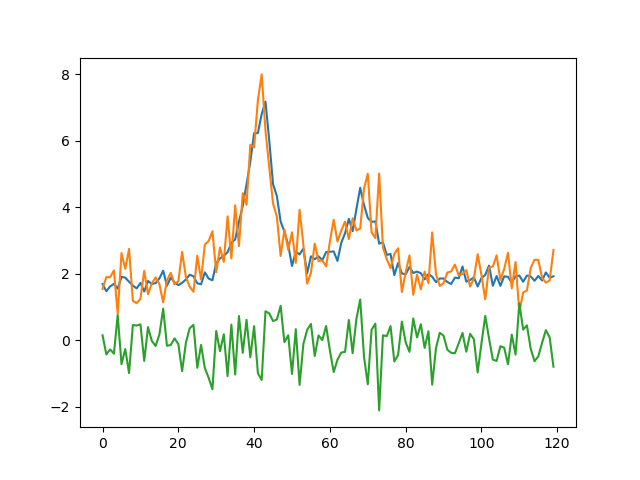

In [24]:
plt.figure()
plt.plot(spectrum_ON_roi1)# - np.average(spectrum_roi1_OFF[0]))
plt.plot(spectrum_OFF_roi1)# - np.average(spectrum_roi1_OFF[0]))
plt.plot(spectrum_ON_roi1 - spectrum_OFF_roi1)

plt.show()

In [59]:
import h5py

howmany = None

output_dir = '/sf/alvra/data/p20222/work/Claudio/PNG/test_JF02/'
os.makedirs(output_dir, exist_ok=True)

datamatrix1 = []
datamatrix2 = []
datamatrix3 = []
datamatrix4 = []
datamatrix5 = []
datamatrix6 = []
datamatrix7 = []
datamatrix8 = []

for i,file in enumerate(patch[:howmany]):
    if howmany is None:
        howmany = len(patch)
    print ("Number {}/{}: {}".format(i+1, min(howmany, len(patch)), file))
    
    with h5py.File(file) as f:
        #print (f['data']['JF02T09V03'].keys())
        dataroi1 = f['data']['JF02T09V03']['data_roi_0'][:]
        dataroi2 = f['data']['JF02T09V03']['data_roi_1'][:]
        dataroi3 = f['data']['JF02T09V03']['data_roi_2'][:]
        dataroi4 = f['data']['JF02T09V03']['data_roi_3'][:]
        dataroi5 = f['data']['JF02T09V03']['data_roi_4'][:]
        dataroi6 = f['data']['JF02T09V03']['data_roi_5'][:]
        dataroi7 = f['data']['JF02T09V03']['data_roi_6'][:]
        dataroi8 = f['data']['JF02T09V03']['data_roi_7'][:]
        
        dataroi1 = threshold(dataroi1, 3, 50)
        dataroi2 = threshold(dataroi2, 3, 50)
        dataroi3 = threshold(dataroi3, 3, 50)
        dataroi4 = threshold(dataroi4, 3, 50)
        dataroi5 = threshold(dataroi5, 3, 50)
        dataroi6 = threshold(dataroi6, 3, 50)
        dataroi7 = threshold(dataroi7, 3, 50)
        dataroi8 = threshold(dataroi8, 3, 50)
        
        
        roi1 = f['data']['JF02T09V03']['roi_0'][:]
        roi2 = f['data']['JF02T09V03']['roi_1'][:]
        roi3 = f['data']['JF02T09V03']['roi_2'][:]
        roi4 = f['data']['JF02T09V03']['roi_3'][:]
        
        datamatrix1.append(np.sum(dataroi1,axis=0).sum(axis=0)/np.max(np.sum(dataroi1,axis=0).sum(axis=0)))
        datamatrix2.append(np.sum(dataroi2,axis=0).sum(axis=0)/np.max(np.sum(dataroi2,axis=0).sum(axis=0)))
        datamatrix3.append(np.sum(dataroi3,axis=0).sum(axis=0)/np.max(np.sum(dataroi3,axis=0).sum(axis=0)))
        datamatrix4.append(np.sum(dataroi4,axis=0).sum(axis=0)/np.max(np.sum(dataroi4,axis=0).sum(axis=0)))
        datamatrix5.append(np.sum(dataroi5,axis=0).sum(axis=0)/np.max(np.sum(dataroi5,axis=0).sum(axis=0)))
        datamatrix6.append(np.sum(dataroi6,axis=0).sum(axis=0)/np.max(np.sum(dataroi6,axis=0).sum(axis=0)))
        datamatrix7.append(np.sum(dataroi7,axis=0).sum(axis=0)/np.max(np.sum(dataroi7,axis=0).sum(axis=0)))
        datamatrix8.append(np.sum(dataroi8,axis=0).sum(axis=0)/np.max(np.sum(dataroi8,axis=0).sum(axis=0)))
        
        plt.figure(figsize=(10,6))
        plt.suptitle(patch[0].split('/')[-4] +'/'+ patch[0].split('/')[-3])
        plt.subplot(241)
        plt.title("ROI1")
        plt.imshow(dataroi1.sum(axis=0),aspect='auto')
        plt.subplot(242)
        plt.title("ROI2")
        plt.imshow(dataroi2.sum(axis=0),aspect='auto')
        plt.subplot(243)
        plt.title("ROI3")
        plt.imshow(dataroi3.sum(axis=0),aspect='auto')
        plt.subplot(244)
        plt.title("ROI4")
        plt.imshow(dataroi4.sum(axis=0),aspect='auto')
        plt.subplot(245)
        plt.title("ROI5")
        plt.imshow(dataroi5.sum(axis=0),aspect='auto')
        plt.subplot(246)
        plt.title("ROI6")
        plt.imshow(dataroi6.sum(axis=0),aspect='auto')
        plt.subplot(247)
        plt.title("ROI7")
        plt.imshow(dataroi7.sum(axis=0),aspect='auto')
        plt.subplot(248)
        plt.title("ROI8")
        plt.imshow(dataroi8.sum(axis=0),aspect='auto')
        plt.tight_layout()
        plt.savefig(output_dir+file.split('/')[-3]+'.png')
        plt.close()
        
        clear_output(wait=True)

Number 140/140: /sf/alvra/data/p20222/work/reduced_data/no_rounding/run0766-DMA_2ps_5uJ/data/acq0001.JF02T09V03.h5


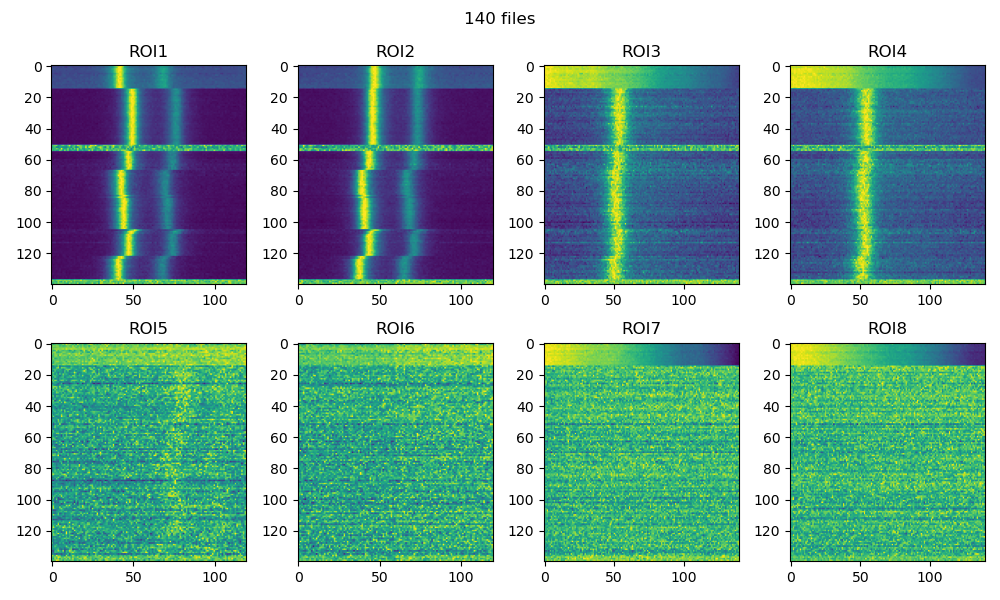

In [60]:
plt.figure(figsize=(10,6))
plt.suptitle('{} files'.format(min(howmany, len(patch))))

plt.subplot(241)
plt.title("ROI1")
plt.imshow(datamatrix1,aspect='auto')

plt.subplot(242)
plt.title("ROI2")
plt.imshow(datamatrix2,aspect='auto')

plt.subplot(243)
plt.title("ROI3")
plt.imshow(datamatrix3,aspect='auto')

plt.subplot(244)
plt.title("ROI4")
plt.imshow(datamatrix4,aspect='auto')

plt.subplot(245)
plt.title("ROI5")
plt.imshow(datamatrix5,aspect='auto')

plt.subplot(246)
plt.title("ROI6")
plt.imshow(datamatrix6,aspect='auto')

plt.subplot(247)
plt.title("ROI7")
plt.imshow(datamatrix7,aspect='auto')

plt.subplot(248)
plt.title("ROI8")
plt.imshow(datamatrix8,aspect='auto')

plt.tight_layout()

In [ ]:
patch[0]

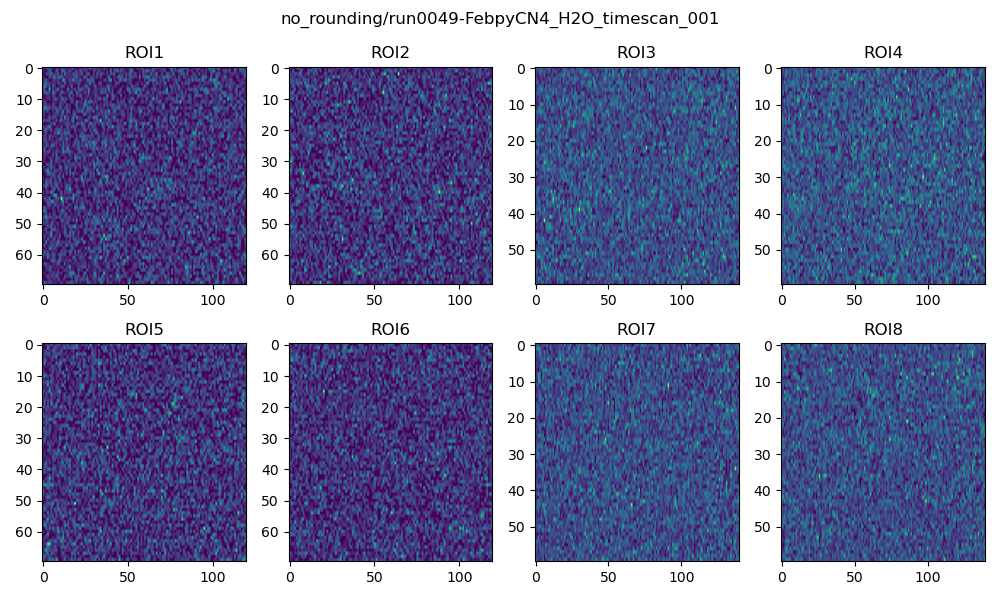

In [61]:
plt.figure(figsize=(10,6))
plt.suptitle(patch[0].split('/')[-4] +'/'+ patch[0].split('/')[-3])

plt.subplot(241)
plt.title("ROI1")
plt.imshow(dataroi1.sum(axis=0),aspect='auto')

plt.subplot(242)
plt.title("ROI2")
plt.imshow(dataroi2.sum(axis=0),aspect='auto')

plt.subplot(243)
plt.title("ROI3")
plt.imshow(dataroi3.sum(axis=0),aspect='auto')

plt.subplot(244)
plt.title("ROI4")
plt.imshow(dataroi4.sum(axis=0),aspect='auto')

plt.subplot(245)
plt.title("ROI5")
plt.imshow(dataroi5.sum(axis=0),aspect='auto')

plt.subplot(246)
plt.title("ROI6")
plt.imshow(dataroi6.sum(axis=0),aspect='auto')

plt.subplot(247)
plt.title("ROI7")
plt.imshow(dataroi7.sum(axis=0),aspect='auto')

plt.subplot(248)
plt.title("ROI8")
plt.imshow(dataroi8.sum(axis=0),aspect='auto')

plt.tight_layout()

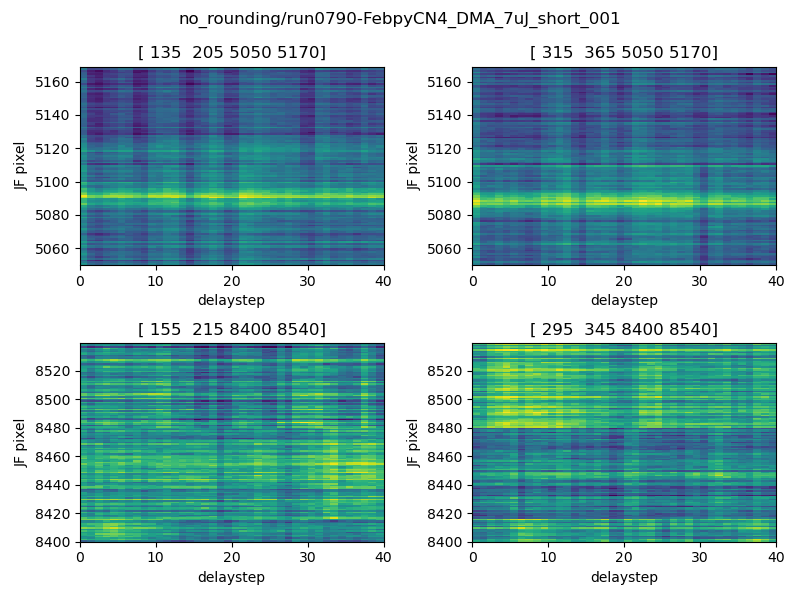

In [268]:
fig = plt.figure(figsize=(8, 6))
plt.suptitle(patch[0].split('/')[-4] +'/'+ patch[0].split('/')[-3])

spectrumarray = [datamatrix1, datamatrix2, datamatrix3, datamatrix4]
dataarray = [roi1.ravel(), roi2.ravel(), roi3.ravel(), roi4.ravel()]

for i in range(4):
    y_axis = np.arange(roiarray[i][2], roiarray[i][3])
    location = 221+i  # this is to index the position of the subplot
    ax = plt.subplot(location)
    ax.pcolormesh(np.arange(41), y_axis, np.transpose(spectrumarray[i]))
    plt.xlabel('delaystep')
    plt.ylabel('JF pixel')
    
    ax.set_title(str(roiarray[i]))

plt.tight_layout()

Text(0.5, 0, 'Delay (fs)')

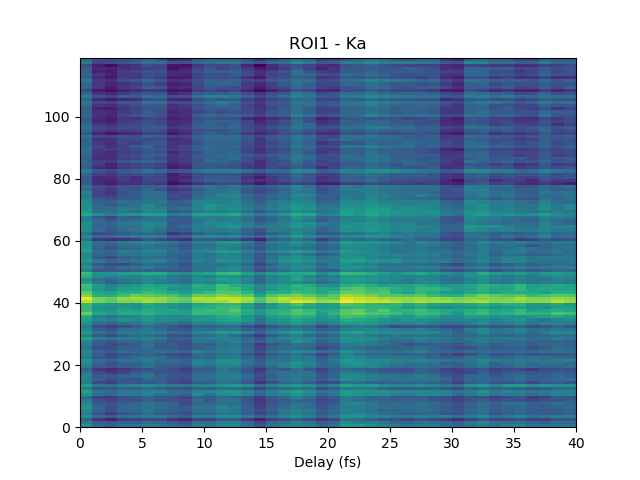

In [253]:
plt.figure()
plt.title('ROI1 - Ka')
plt.pcolormesh(np.arange(41), np.arange(120), np.transpose(datamatrix1))
plt.xlabel('Delay (fs)')

In [235]:
from alvra_tools.utils import *
def plot_tool_static(spectrum, x_axis, bin_):
    
    spectrum_rebin  = bin_sum(spectrum,  bin_)
    x_axis_rebin = bin_mean(x_axis, bin_)
    
    spectrum_err  = np.sqrt(abs(spectrum_rebin))

    low_err = spectrum_rebin - spectrum_err
    high_err = spectrum_rebin + spectrum_err
    return x_axis_rebin, spectrum_rebin, low_err, high_err

In [243]:
spectrum_roi1 = np.average(dataroi1,axis=0).sum(axis=0)
spectrum_roi2 = np.average(dataroi2,axis=0).sum(axis=0)
spectrum_roi3 = np.average(dataroi3,axis=0).sum(axis=0)
spectrum_roi4 = np.average(dataroi4,axis=0).sum(axis=0)

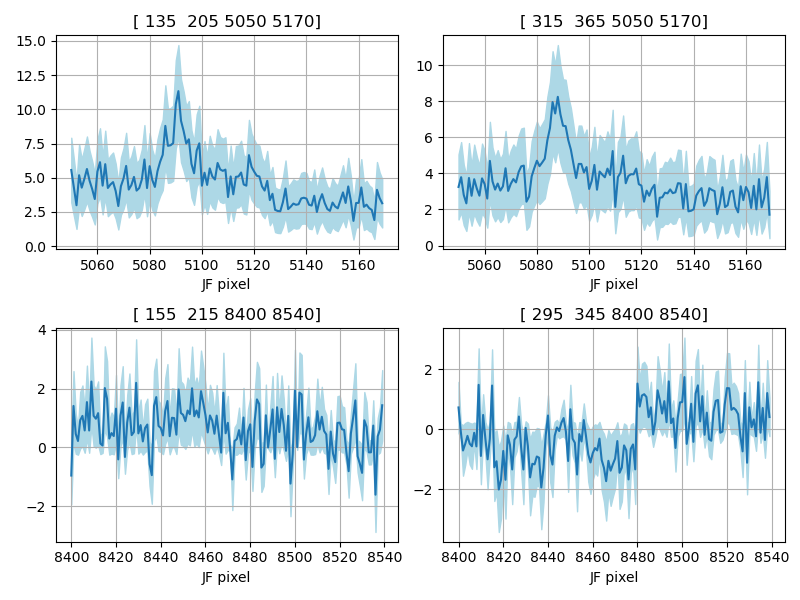

In [258]:
fig = plt.figure(figsize=(8, 6))
#plt.suptitle(fc.selected_filename)

binarray = [1,1,1,1] # change the bin size if wanted, 1 is every pixel
spectrumarray = [spectrum_roi1, spectrum_roi2, spectrum_roi3, spectrum_roi4]
roiarray = [roi1.ravel(), roi2.ravel(), roi3.ravel(), roi4.ravel()]

for i in range(4):
    x_axis = np.arange(roiarray[i][2], roiarray[i][3])
    x_axis_rebin, spectrum_rebin, low_err, high_err = plot_tool_static(spectrumarray[i], x_axis, binarray[i])
    location = 221+i  # this is to index the position of the subplot
    ax = plt.subplot(location)
    ax.plot(x_axis_rebin,spectrum_rebin)
    ax.fill_between(x_axis_rebin, low_err, high_err, color='lightblue')
    plt.grid()
    plt.xlabel('JF pixel')

    ax.set_title(str(roiarray[i]))
plt.tight_layout()

In [112]:
from alvra_tools.utils import timestamp

In [119]:
datafiles=[]
for file in glob.glob('/sf/alvra/data/p20537/raw/*loop4*/meta/scan.json'):
    datafiles.append(file)
datafiles = sorted(datafiles, key = os.path.getmtime)
patch =  datafiles[:]
print (len(patch))

channel_list = ["SAR-CVME-TIFALL5:EvtSet", 'SARES11-SPEC125-M1.edge_position']

valid_shots = []
timestamps_npy = []

for json_file in patch[:3]:
    scan = SFScanInfo(json_file)
    for i,step in enumerate(scan):
        clear_output(wait=True)
        print (i, json_file)
        t_file = timestamp(json_file)
        timestamps_npy.append(t_file)
        subset = step[channel_list]
        subset.drop_missing()
        valid_idx = subset['SARES11-SPEC125-M1.edge_position'].valid
        valid_shots.append(len(valid_idx))
    
    

40 /sf/alvra/data/p20537/raw/run0015-SiN_timing_loop4_003/meta/scan.json


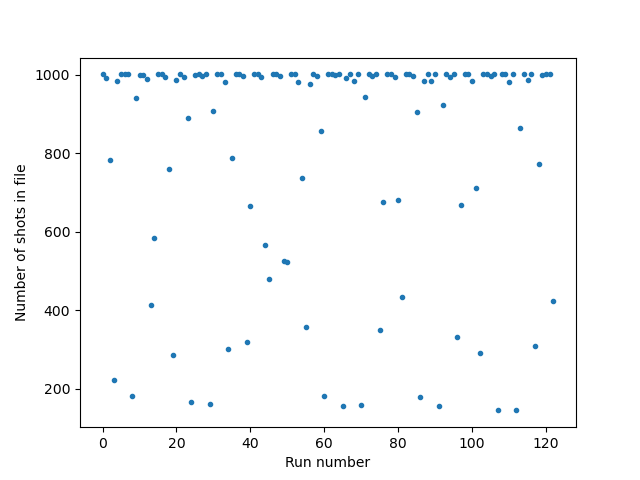

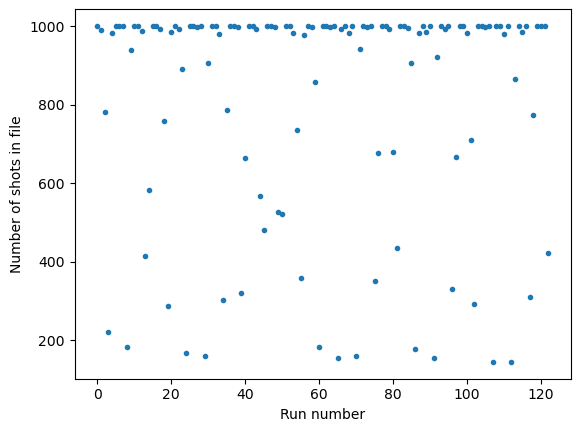

In [123]:
plt.figure()
plt.plot(valid_shots,'.')
plt.xlabel('Run number')
plt.ylabel('Number of shots in file')
plt.show()

In [ ]:
scan.files[0]

['/sf/alvra/data/p20263/raw/run0029-FePhen_535nm_4uJ_shortpulse_001/data/acq0001.PVCHANNELS.h5',
 '/sf/alvra/data/p20263/raw/run0029-FePhen_535nm_4uJ_shortpulse_001/data/acq0001.BSDATA.h5',
 '/sf/alvra/data/p20263/raw/run0029-FePhen_535nm_4uJ_shortpulse_001/data/acq0001.CAMERAS.h5',
 '/sf/alvra/data/p20263/raw/run0029-FePhen_535nm_4uJ_shortpulse_001/data/acq0001.JF06T32V02.h5',
 '/sf/alvra/data/p20263/raw/run0029-FePhen_535nm_4uJ_shortpulse_001/data/acq0001.JF02T09V03.h5']

In [ ]:
def correct_path(scan, step, JF, binned, work):
    if work:
        print ('----- Use reduced data WORK -----')
        for fn in step.fnames:
            if JF in fn:
                break
        raw_fn = fn.replace('p20222/raw/','p20222/work/reduced_data/no_rounding/')
        raw_f = SFDataFile(raw_fn)
        step.update(raw_f)
        step.fnames.append(raw_fn)
        step.files.append(raw_f)     
    else:
        check_raw_folder = scan.fname.replace('meta/scan.json', 'raw_data/')
        folder_raw_size = len(os.listdir(check_raw_folder))
        if binned:
            if folder_raw_size>0:
                print ('----- Use reduced data -----')
                step=step
            else:
                print ('----- No reduced data found!! ------')
        else:
            if folder_raw_size>0:
                print ('----- Use raw data -----')
                for fn in step.fnames:
                    if JF in fn:
                        break
                #raw_fn = fn.replace('/data/acq','/raw_data/acq')
                #print ('aaa', fn)
                raw_fn = fn.replace('p20222/raw/','p20222/work/reduced_data/no_rounding/')
                #print ('bbb', raw_fn)
                raw_f = SFDataFile(raw_fn)
                step.update(raw_f)
                step.fnames.append(raw_fn)
                step.files.append(raw_f)
            else:
                print ('----- Use reduced data -----')
    return step

In [52]:
fn = '/sf/alvra/data/p20263/work/data_reduction/Output/run_0008_reducedunchunked.npy'

data = np.load(fn, allow_pickle=True).tolist()

scanvar = data.get('scanvar')
q = data.get('q')
img = data.get('Sazi')
idx_valid = data.get('idx_valid')

In [54]:
np.shape(idx_valid[0])

(999,)

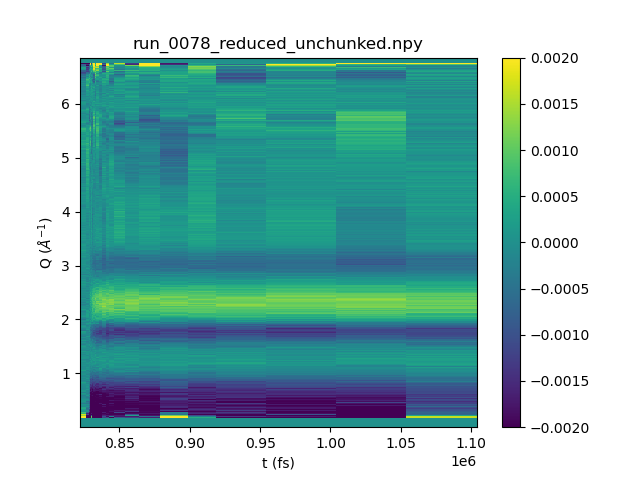

In [32]:
import matplotlib.pyplot as plt
 
plt.figure()
plt.title(fn.split('/')[-1])
plt.pcolormesh(scanvar, q, img, shading='auto')
plt.colorbar()
plt.clim([-0.002,0.002])
plt.xlabel('t (fs)')
plt.ylabel('Q ($\AA^{-1}$)')
plt.show()

In [115]:
fn_No_rounding = '/sf/alvra/data/p20266/work/alvra_beamline_scripts/XSS_reduction/Output/run_0606_reduced_No_Rounding.npy'
fn_250 = '/sf/alvra/data/p20266/work/alvra_beamline_scripts/XSS_reduction/Output/run_0606_reduced_250eV.npy'
fn_11keV = '/sf/alvra/data/p20266/work/alvra_beamline_scripts/XSS_reduction/Output/run_0606_reduced_11keV.npy'

No_rounding = np.load(fn_No_rounding, allow_pickle=True).tolist()
Rounding_250 = np.load(fn_250, allow_pickle=True).tolist()
Rounding_11keV = np.load(fn_11keV, allow_pickle=True).tolist()

No_rounding.keys()

dict_keys(['Sazi', 'on_avg', 'off_avg', 'scanvar', 'q'])

In [116]:
img_250 = Rounding_250.get('Sazi')
img_noRounding = No_rounding.get('Sazi')
img_11keV = Rounding_11keV.get('Sazi')

scanvar = Rounding_250.get('scanvar')
q = Rounding_250.get('q')

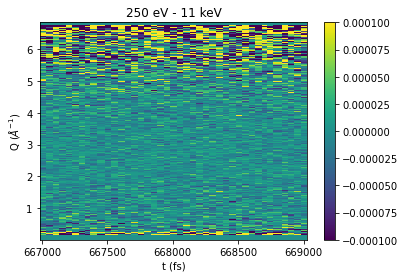

In [124]:
import matplotlib.pyplot as plt
 
plt.figure()
plt.pcolormesh(scanvar, q, img_250-img_11keV, shading='auto')
plt.colorbar()
plt.clim([-0.0001,0.0001])
plt.xlabel('t (fs)')
plt.ylabel('Q ($\AA^{-1}$)')
plt.title ('250 eV - 11 keV')
plt.show()

In [7]:
import jungfrau_utils as ju
fn = '/sf/alvra/data/p20572/raw/run0365-test_FeFoil_50Hz_JF50Hz_1burst_ev200_50Hz_div2/data/acq0001.JF06T32V02.h5'
#with ju.File(fn, pedestal_file='/sf/alvra/data/p17502/raw/JF_pedestals/20221116_121847.JF06T32V02.res.h5') as juf:
with ju.File(fn) as juf:
    img = juf[:]
    intensity = img.sum(axis=1).sum(axis=1)

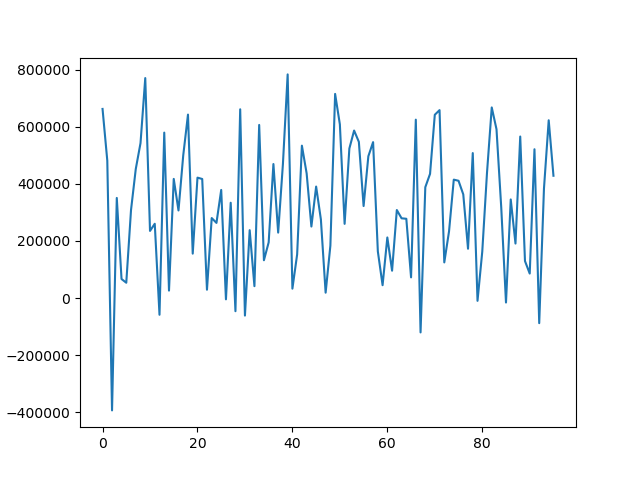

In [8]:
plt.figure()
plt.plot(intensity)
plt.show()

In [11]:
np.shape(img)

(99, 4214, 4982)

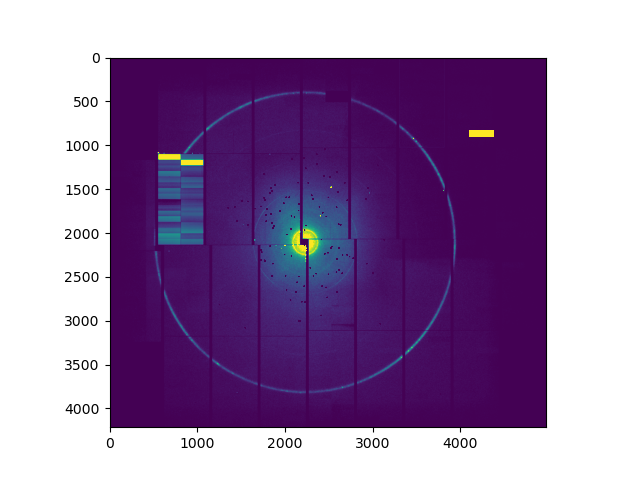

In [29]:
plt.figure()
plt.imshow(img[0], vmin = 0, vmax = 50)
plt.show()

In [2]:
A = (5,6)
B = (15,6)
C = (15,2)
#steps_x = 6
#steps_y = 5
stepsize_x = 1
stepsize_y = 1

In [6]:
print ('{:.3f}, {:.3f}: {}'.format(primeSample.x.get_current_value(), primeSample.y.get_current_value(), ccta.pid))

In [3]:
ang = np.arctan((B[1]-A[1])/(B[0]-A[0]))

x = np.linspace(A[0], B[0], np.int(np.abs((B[0]+stepsize_x-A[0])/stepsize_x)))
y = np.linspace(A[1], C[1], np.int(np.abs((A[1]+stepsize_y-C[1])/stepsize_y)))

#x = np.arange(A[0], B[0]+stepsize_x, stepsize_x)
#y = np.arange(A[1], C[1]+stepsize_y, -stepsize_y)

gx, gy = np.meshgrid(x,y)
gx[1::2] = gx[1::2][..., ::-1]

gxr = A[0] + (gx-A[0])*np.cos(ang) - (gy-A[1])*np.sin(ang)
gyr = A[1] + (gx-A[0])*np.sin(ang) + (gy-A[1])*np.cos(ang)

In [4]:
print (x)
print (y)

[ 5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
[6. 5. 4. 3. 2.]


In [19]:
start=-2000
stop=5000
stepsize=1000

##############################

delays = np.arange(start,stop+stepsize,stepsize)
delays

array([-2000, -1000,     0,  1000,  2000,  3000,  4000,  5000])

In [24]:
coord  = list(zip(gxr.flatten(), gyr.flatten()))
for index, (x,y) in enumerate(coord):
    print (index, '{:.3f}, {:.3f}'.format(x,y))

0 5.000, 6.000
1 6.000, 6.000
2 7.000, 6.000
3 8.000, 6.000
4 9.000, 6.000
5 10.000, 6.000
6 11.000, 6.000
7 12.000, 6.000
8 13.000, 6.000
9 14.000, 6.000
10 15.000, 6.000
11 15.000, 5.000
12 14.000, 5.000
13 13.000, 5.000
14 12.000, 5.000
15 11.000, 5.000
16 10.000, 5.000
17 9.000, 5.000
18 8.000, 5.000
19 7.000, 5.000
20 6.000, 5.000
21 5.000, 5.000
22 5.000, 4.000
23 6.000, 4.000
24 7.000, 4.000
25 8.000, 4.000
26 9.000, 4.000
27 10.000, 4.000
28 11.000, 4.000
29 12.000, 4.000
30 13.000, 4.000
31 14.000, 4.000
32 15.000, 4.000
33 15.000, 3.000
34 14.000, 3.000
35 13.000, 3.000
36 12.000, 3.000
37 11.000, 3.000
38 10.000, 3.000
39 9.000, 3.000
40 8.000, 3.000
41 7.000, 3.000
42 6.000, 3.000
43 5.000, 3.000
44 5.000, 2.000
45 6.000, 2.000
46 7.000, 2.000
47 8.000, 2.000
48 9.000, 2.000
49 10.000, 2.000
50 11.000, 2.000
51 12.000, 2.000
52 13.000, 2.000
53 14.000, 2.000
54 15.000, 2.000


In [35]:
start_pos=17
nshots=2

delays = np.arange(-2000, 5000+1000, 1000)
for index_delay, delay in enumerate(delays):
    print (index_delay)
    new_t = delay
    for index_pos, (x,y) in enumerate(coord[start_pos+index_delay*nshots:start_pos+index_delay*nshots+nshots]):
        current_shot = start_pos+(index_pos+index_delay*nshots)
        print ('delay={} fs, index = {}, coord = {}'.format(delay, current_shot, coord[index_pos]))
next_pos = start_pos + (index_pos+1)*(index_delay+1) +1
print ('Used {} targets until pos: {}'.format((next_pos-1), coord[next_pos-1]))
print ('{} targets left before reaching end point {}'.format(len(coord)-(next_pos-1), coord[-1]))
print ('Next scan starts from target {} at position {}'.format(next_pos, coord[next_pos]))


0
delay=-2000 fs, index = 17, coord = (5.0, 6.0)
delay=-2000 fs, index = 18, coord = (6.0, 6.0)
1
delay=-1000 fs, index = 19, coord = (5.0, 6.0)
delay=-1000 fs, index = 20, coord = (6.0, 6.0)
2
delay=0 fs, index = 21, coord = (5.0, 6.0)
delay=0 fs, index = 22, coord = (6.0, 6.0)
3
delay=1000 fs, index = 23, coord = (5.0, 6.0)
delay=1000 fs, index = 24, coord = (6.0, 6.0)
4
delay=2000 fs, index = 25, coord = (5.0, 6.0)
delay=2000 fs, index = 26, coord = (6.0, 6.0)
5
delay=3000 fs, index = 27, coord = (5.0, 6.0)
delay=3000 fs, index = 28, coord = (6.0, 6.0)
6
delay=4000 fs, index = 29, coord = (5.0, 6.0)
delay=4000 fs, index = 30, coord = (6.0, 6.0)
7
delay=5000 fs, index = 31, coord = (5.0, 6.0)
delay=5000 fs, index = 32, coord = (6.0, 6.0)
Used 33 targets until pos: (15.0, 3.0)
22 targets left before reaching end point (15.0, 2.0)
Next scan starts from target 34 at position (14.0, 3.0)


In [ ]:
print (ang*180/np.pi)

In [ ]:
print (gxr[0][0], gyr[0][0])
print (gxr[0][-1], gyr[0][-1])

In [ ]:
z = np.arange(gx.size)
z = z.reshape(gx.shape)

plt.figure()
plt.scatter(gxr,gyr,c=z)
plt.grid()
#plt.xlim(0,20)
#plt.ylim(0,20)

plt.show()

In [ ]:
import time
pids_list = []
for x,y in zip(gxr.flatten(), gyr.flatten()):
    tx = primeSample.x.set(x)
    ty = primeSample.y.set(y)
    for t in (tx,ty):
        t.wait()
    ccta.burst()
    time.sleep(0.05)
    pids_list.append(ccta.pid)
    print (primeSample.x.get_current_value(), primeSample.y.get_current_value(), ccta.pid)
daq.retrieve("test_scan_1", pids_list)

In [34]:
len(np.arange(-2000, 15000+500, 500))

35